In [590]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re

import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

import numpy as np

from scipy.interpolate import interp1d

from astropy.time import Time
from astropy.io import fits

In [591]:
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture
#from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import (ImageNormalize,MinMaxInterval, SqrtStretch)

from photutils import DAOStarFinder
from photutils import make_source_mask
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground

In [592]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(10,10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [593]:
def FindSources(data):
    """
    """
    mean, median, std = sigma_clipped_stats(data, sigma=3.0)
    daofind = DAOStarFinder(fwhm=10.0, threshold=10.*std)    
    sources = daofind(data - median) 
    #sources = daofind(data) 
    return sources

In [594]:
def GetExtractionParam(sources,width=20):
    """
    """
    
    y0=sources["ycentroid"][0]
    x0=sources["xcentroid"][0]

    xmin=int(x0-width)
    xmax=int(x0+width)
    ymin=int(y0-width)
    ymax=int(y0+width)
    
    return x0,y0,xmin,xmax,ymin,ymax

In [595]:
# where are the spectra
#----------------------
thedate = "20190215"
rawinput_directory="/Users/dagoret/DATA/PicDuMidiFev2019/prod_"+thedate+"_v4"

In [596]:
#file="T1M_20190216_041126_502_HD116405_Filtre_None_bin1x1.365_red.fit"
#file="T1M_20190216_042315_191_HD116405_Filtre_None_bin1x1.372_red.fit"
file1="T1M_20190216_041126_502_HD116405_Filtre_None_bin1x1.365_red.fit"
file2="T1M_20190216_050349_661_HD116405_Filtre_None_bin1x1.441_red.fit"

In [597]:
fullfilename1=os.path.join(rawinput_directory,file1)
fullfilename2=os.path.join(rawinput_directory,file2)

In [598]:
hdu1 = fits.open(fullfilename1)
hdu2 = fits.open(fullfilename2)

In [599]:
data1=hdu1[0].data
data2=hdu2[0].data

In [600]:
norm1 = ImageNormalize(data1, interval=MinMaxInterval(),stretch=SqrtStretch())
norm2 = ImageNormalize(data2, interval=MinMaxInterval(),stretch=SqrtStretch())

Text(0.5, 1.0, 'T1M_20190216_050349_661_HD116405_Filtre_None_bin1x1.441_red.fit')

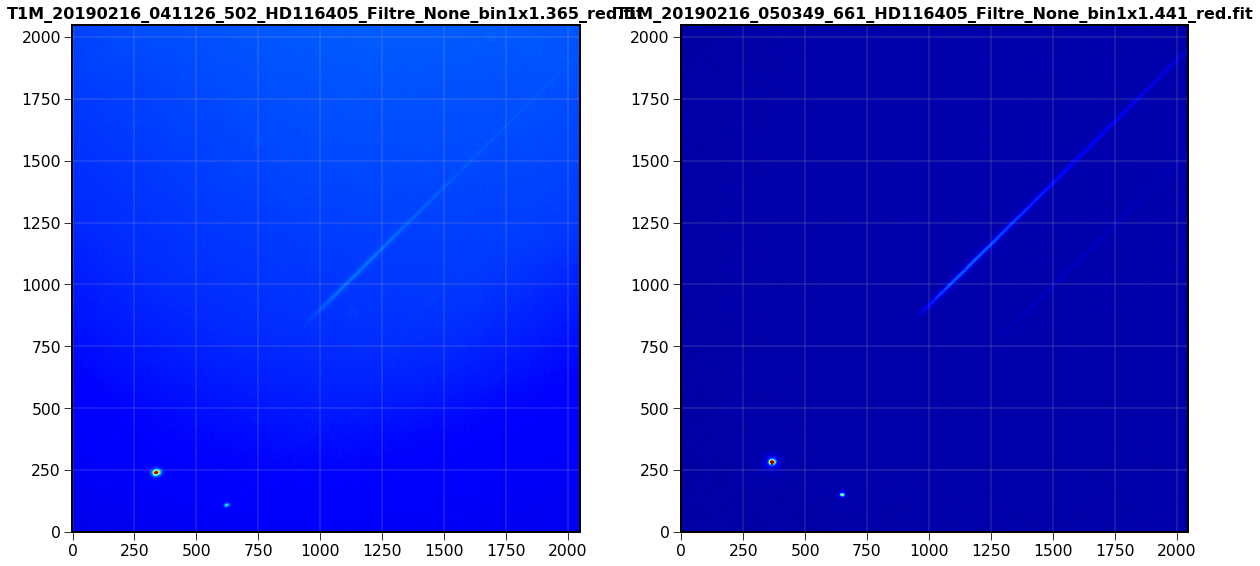

In [601]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(data1,origin="lower",cmap="jet",norm=norm1)
plt.title(file1)
plt.grid()
plt.subplot(1,2,2)
plt.imshow(data2,origin="lower",cmap="jet",norm=norm2)
plt.grid()
plt.title(file2)

In [602]:
cutimg1=data1[0:750,0:750]
cutimg2=data2[0:750,0:750]

In [603]:
sources2=FindSources(cutimg2)

In [604]:
positions1 = (sources1['xcentroid'], sources1['ycentroid'])
positions2 = (sources2['xcentroid'], sources2['ycentroid'])

In [605]:
for col in sources1.colnames:    
    sources1[col].info.format = '%.8g'  # for consistent table output
print(sources1)   

 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
  1  622.6511 107.62684 0.43689032 ...   0 8694.0148 5.6724417 -1.8844251
  2 336.88938 238.08896 0.35141733 ...   0 62675.175 34.872423 -3.8562053
  3 340.14348 239.39923 0.36507772 ...   0 62693.591  33.41365 -3.8098098


In [606]:
for col in sources2.colnames:    
    sources2[col].info.format = '%.8g'  # for consistent table output
print(sources2)   

 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
  1 650.85587 149.84426 0.39142384 ...   0 22860.156 389.15405 -6.4753039
  2 366.88591 276.74217 0.26547454 ...   0 64467.294 1141.5456 -7.6437332
  3 369.60417 281.72175 0.39723941 ...   0 63898.829 801.64431 -7.2599543
  4 362.58712 282.06389 0.31912971 ...   0 64623.729 807.57274 -7.2679541


In [607]:
sources1

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,622.6511,107.62684,0.43689032,0.25627798,-0.80241251,169,0,8694.0148,5.6724417,-1.8844251
2,336.88938,238.08896,0.35141733,0.046207573,-0.16307684,169,0,62675.175,34.872423,-3.8562053
3,340.14348,239.39923,0.36507772,0.2023789,-0.49373877,169,0,62693.591,33.41365,-3.8098098


In [608]:
sources2

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,650.85587,149.84426,0.39142384,-0.2482987,-0.75749849,169,0,22860.156,389.15405,-6.4753039
2,366.88591,276.74217,0.26547454,-0.14137959,0.071919848,169,0,64467.294,1141.5456,-7.6437332
3,369.60417,281.72175,0.39723941,-0.0066138031,-0.2384131,169,0,63898.829,801.64431,-7.2599543
4,362.58712,282.06389,0.31912971,0.35625743,0.3321658,169,0,64623.729,807.57274,-7.2679541


In [609]:
halfwidth=100
x01,y01,xmin1,xmax1,ymin1,ymax1=GetExtractionParam(sources1,width=halfwidth)
x02,y02,xmin2,xmax2,ymin2,ymax2=GetExtractionParam(sources2,width=halfwidth)

In [610]:
vignette1=data1[ymin1:ymax1,xmin1:xmax1]
vignette2=data2[ymin2:ymax2,xmin2:xmax2]

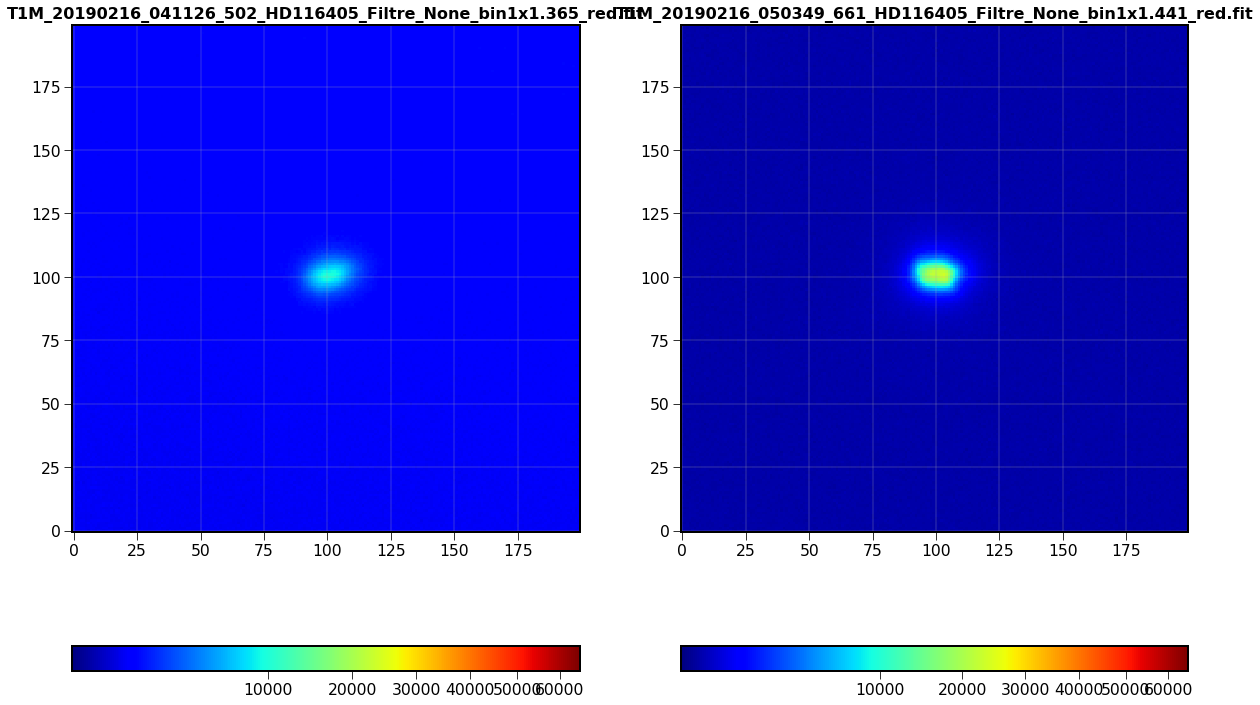

In [611]:
plt.figure(figsize=(20,14))
plt.subplot(1,2,1)
img=plt.imshow(vignette1,origin="lower",cmap="jet",norm=norm1)
plt.title(file1)
plt.colorbar(img,orientation="horizontal")
plt.grid()
plt.subplot(1,2,2)
img=plt.imshow(vignette2,origin="lower",cmap="jet",norm=norm2)
plt.grid()
plt.title(file2)
plt.colorbar(img,orientation="horizontal")

(0, 400000)

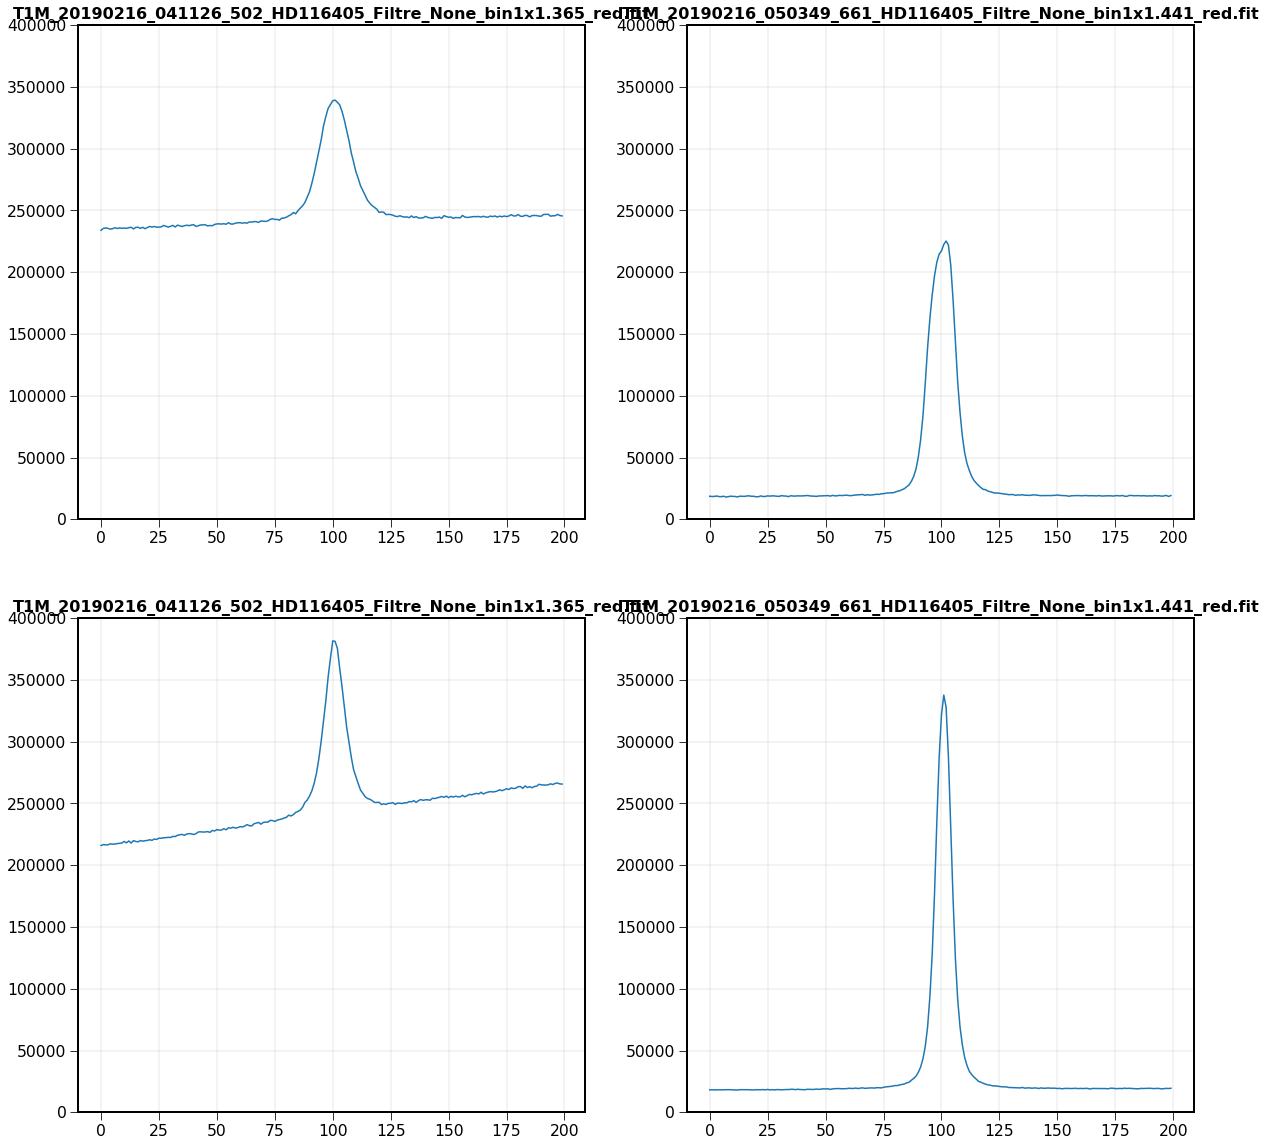

In [612]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
profileX=np.sum(vignette1,axis=0)
plt.plot(profileX)
plt.title(file1)
plt.grid()
plt.ylim(0,400000)
plt.subplot(2,2,2)
profileX=np.sum(vignette2,axis=0)
plt.plot(profileX)
plt.grid()
plt.title(file2)
plt.ylim(0,400000)
plt.subplot(2,2,3)
profileY=np.sum(vignette1,axis=1)
plt.plot(profileY)
plt.title(file1)
plt.grid()
plt.ylim(0,400000)
plt.subplot(2,2,4)
profileY=np.sum(vignette2,axis=1)
plt.plot(profileY)
plt.grid()
plt.title(file2)
plt.ylim(0,400000)

In [613]:
np.max(vignette1)

10250.65387441782

In [614]:
np.max(vignette2)

23867.773512287116

In [615]:
from photutils import aperture_photometry
from photutils import CircularAperture

In [616]:
newx0=halfwidth
newy0=halfwidth

In [617]:
newx0

100

In [618]:
aperture= CircularAperture((newx0,newy0), r=25.)

In [619]:
phot_table1 = aperture_photometry(vignette1, aperture)
phot_table2 = aperture_photometry(vignette2, aperture)

In [620]:
for col in phot_table1.colnames:    
    phot_table1[col].info.format = '%.4g'  # for consistent table output
for col in phot_table2.colnames:    
    phot_table2[col].info.format = '%.4g'  # for consistent table output

In [621]:
phot_table1

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,100,100,4.07e+06


In [622]:
phot_table2

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,100,100,3.118e+06


## Annular photometry of background

In [623]:
from photutils import CircularAperture, CircularAnnulus

In [624]:
annulus_aperture = CircularAnnulus((newx0,newy0), r_in=40, r_out=50)

In [625]:
annulus_masks = annulus_aperture.to_mask(method='center')

In [626]:
#plt.imshow(annulus_masks[0],cmap="jet")

In [627]:
annulus_data1 = annulus_masks[0].multiply(vignette1)
annulus_data2 = annulus_masks[0].multiply(vignette2)

In [628]:
mask = annulus_masks[0].data
annulus_data_1d_1 = annulus_data1[mask > 0]
annulus_data_1d_2 = annulus_data2[mask > 0]

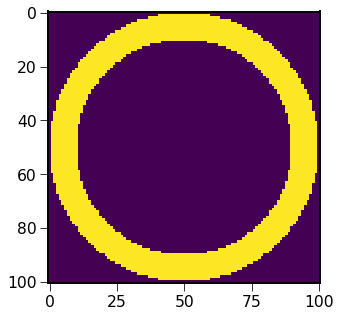

In [629]:
plt.figure(figsize=(5,5))
plt.imshow(mask)

In [630]:
 _, median_sigclip1, _ = sigma_clipped_stats(annulus_data_1d_1)
 _, median_sigclip2, _ = sigma_clipped_stats(annulus_data_1d_2)

In [631]:
median_sigclip1

1214.4423769664022

In [632]:
median_sigclip2

100.71479425435744

In [633]:
background1 = median_sigclip1 * annulus_aperture.area()
background2 = median_sigclip2 * annulus_aperture.area()

In [634]:
fullbg1 = np.full_like(annulus_data1, median_sigclip1)
fullbg2 = np.full_like(annulus_data2, median_sigclip2)

In [635]:
bg1=annulus_masks[0]*fullbg1
bg2=annulus_masks[0]*fullbg2

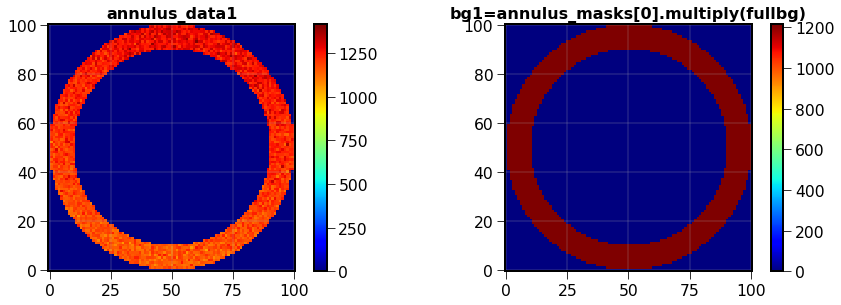

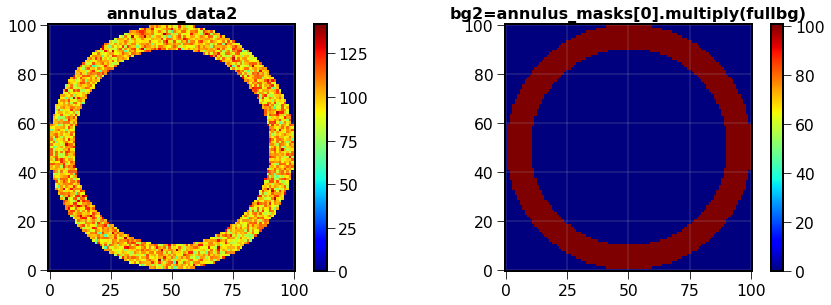

In [636]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
img=plt.imshow(annulus_data1,origin="lower",cmap="jet")
plt.title("annulus_data1")
plt.grid()
plt.colorbar(img)
plt.subplot(2,2,2)
img=plt.imshow(bg1,origin="lower",cmap="jet")
plt.title("bg1=annulus_masks[0].multiply(fullbg)")
plt.grid()
plt.colorbar(img)
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
img=plt.imshow(annulus_data2,origin="lower",cmap="jet")
plt.title("annulus_data2")
plt.grid()
plt.colorbar(img)
plt.subplot(2,2,4)
img=plt.imshow(bg2,origin="lower",cmap="jet")
plt.title("bg2=annulus_masks[0].multiply(fullbg)")
plt.grid()
plt.colorbar(img)

In [637]:
bkgres1=annulus_data1-bg1
bkgres2=annulus_data2-bg2

In [638]:
norm1 = ImageNormalize(signal1, interval=MinMaxInterval(),stretch=SqrtStretch())
norm2 = ImageNormalize(signal2, interval=MinMaxInterval(),stretch=SqrtStretch())

Text(0.5, 1.0, 'T1M_20190216_050349_661_HD116405_Filtre_None_bin1x1.441_red.fit')

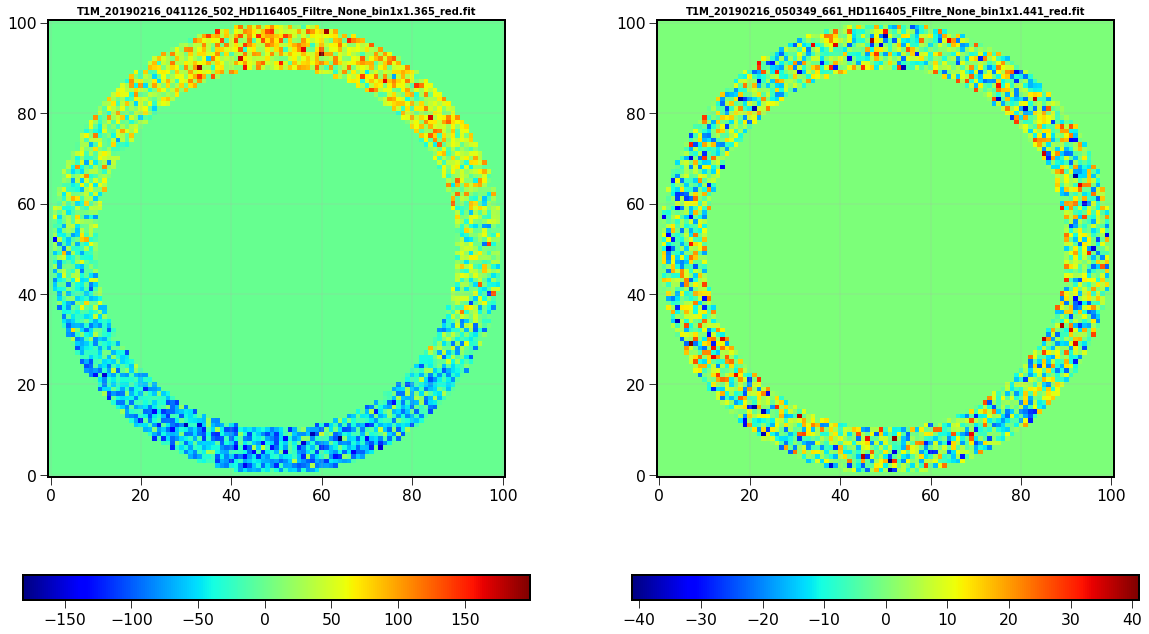

In [668]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
img=plt.imshow(bkgres1,origin="lower",cmap="jet")
plt.grid()
plt.colorbar(img,orientation="horizontal")
plt.title(file1,fontsize=10)

plt.subplot(1,2,2)
img=plt.imshow(bkgres2,origin="lower",cmap="jet")
plt.grid()
plt.colorbar(img,orientation="horizontal")
plt.title(file2,fontsize=10)


# Subtract by hand background

In [640]:
bgtotal1 = np.full_like(vignette1, median_sigclip1)
bgtotal2 = np.full_like(vignette2, median_sigclip2)

In [641]:
signal1=vignette1-bgtotal1
signal2=vignette2-bgtotal2

In [642]:
norm1 = ImageNormalize(signal1, interval=MinMaxInterval(),stretch=SqrtStretch())
norm2 = ImageNormalize(signal2, interval=MinMaxInterval(),stretch=SqrtStretch())

In [643]:
theannulus_aperture = CircularAnnulus((newx0,newy0), r_in=40, r_out=50)

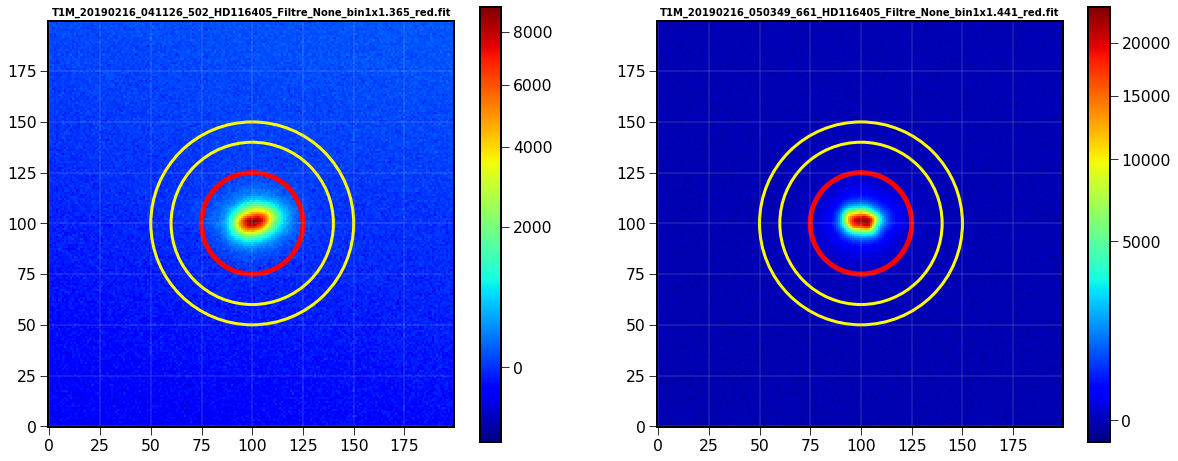

In [665]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
img=plt.imshow(signal1,origin="lower",cmap="jet",norm=norm1)
plt.grid()
plt.colorbar(img)
plt.title(file1,fontsize=10)
aperture.plot(color="red",lw=5)
theannulus_aperture.plot(color="yellow",lw=3)
plt.subplot(1,2,2)
img=plt.imshow(signal2,origin="lower",cmap="jet",norm=norm2)
plt.grid()
plt.colorbar(img)
plt.title(file2,fontsize=10)
aperture.plot(color="red",lw=5)
theannulus_aperture.plot(color="yellow",lw=3)

In [645]:
signal1.sum()

1467727.1250760928

In [646]:
signal2.sum()

2756032.012652811

In [647]:
-2.5*np.log10(signal1.sum())

-15.416613301263936

In [648]:
-2.5*np.log10(signal2.sum())

-16.10071064451651

# Circular photometry

In [649]:
star_aperture= CircularAperture((newx0,newy0), r=25.)

In [650]:
phot_table1 = aperture_photometry(signal1, star_aperture)
phot_table2 = aperture_photometry(signal2, star_aperture)

In [651]:
for col in phot_table1.colnames:    
    phot_table1[col].info.format = '%.4g'  # for consistent table output
for col in phot_table2.colnames:    
    phot_table2[col].info.format = '%.4g'  # for consistent table output

In [652]:
phot_table1

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,100,100,1.685e+06


In [653]:
phot_table2

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,100,100,2.92e+06


# Total computation of photometry

In [654]:
theannulus_aperture = CircularAnnulus((newx0,newy0), r_in=40, r_out=50)
print(theannulus_aperture.area(),"pixels")

2827.4333882308138 pixels


In [655]:
print(star_aperture.area(),"pixels")

1963.4954084936207 pixels


In [656]:
def compute(vignette,star_aperture):
    gel=4.8 # electrons per ADU
    theannulus_aperture = CircularAnnulus((newx0,newy0), r_in=40, r_out=50)
    theannulus_masks = theannulus_aperture.to_mask(method='center')
    theannulus_data = theannulus_masks[0].multiply(vignette)  # the annulus data image
    themask = theannulus_masks[0].data
    theannulus_data_1d = theannulus_data[themask > 0]
    _, themedian_sigclip, _ = sigma_clipped_stats(theannulus_data_1d)
    print("themedian_sigclip=",themedian_sigclip)
    thefullbg = np.full_like(theannulus_data, themedian_sigclip)
 
    thebg=theannulus_masks[0]*thefullbg

    theerror = np.sqrt(vignette/gel) # should be better calculated
    phot = aperture_photometry(vignette, star_aperture,error=theerror)
    phot['annulus_median'] = themedian_sigclip
    phot['aper_bkg'] = themedian_sigclip * star_aperture.area()
    phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
    for col in phot.colnames:
        phot[col].info.format = '%.5g'  # for consistent table output
    print(phot)
    
    return phot

In [657]:
phot_table1=compute(vignette1,star_aperture)

themedian_sigclip= 1214.4423769664022
 id xcenter ycenter aperture_sum ... annulus_median  aper_bkg  aper_sum_bkgsub
      pix     pix                ...                                          
--- ------- ------- ------------ ... -------------- ---------- ---------------
  1     100     100   4.0696e+06 ...         1214.4 2.3846e+06       1.685e+06


In [658]:
phot_table2=compute(vignette2,star_aperture)

themedian_sigclip= 100.71479425435744
 id xcenter ycenter aperture_sum ... annulus_median  aper_bkg  aper_sum_bkgsub
      pix     pix                ...                                          
--- ------- ------- ------------ ... -------------- ---------- ---------------
  1     100     100   3.1179e+06 ...         100.71 1.9775e+05      2.9201e+06


In [659]:
phot_table1

id,xcenter,ycenter,aperture_sum,aperture_sum_err,annulus_median,aper_bkg,aper_sum_bkgsub
,pix,pix,,,,,
int64,float64,float64,float64,float64,float64,float64,float64
1,100,100,4.0696e+06,920.78,1214.4,2.3846e+06,1.685e+06


In [660]:
-2.5*np.log10(phot_table1["aper_sum_bkgsub"])

-15.567


In [661]:
phot_table2

id,xcenter,ycenter,aperture_sum,aperture_sum_err,annulus_median,aper_bkg,aper_sum_bkgsub
,pix,pix,,,,,
int64,float64,float64,float64,float64,float64,float64,float64
1,100,100,3.1179e+06,805.95,100.71,1.9775e+05,2.9201e+06


In [662]:
-2.5*np.log10(phot_table2["aper_sum_bkgsub"])

-16.163
